## Correlation Analysis Cheatsheet
`https://dataanalysis.substack.com/p/correlation-analysis-101-in-python?s=r`

### What?

Correlation analysis is one of the more common ways to learn the relationship between 2 or more variables. 

A Correlation is represented as a value between -1 and +1 where +1 denotes the highest positive correlation, -1 denotes the highest negative correlation, and 0 denotes that there is no correlation.

### When / Why?

From a business perspective, correlation analysis helps you to answer questions like: 

- What is the relationship between 2 features? 
- Are they dependent or independent?
- Do they increase and decrease together (positive correlation)?
- Does one increase when the other decreases and vice versa (negative correlation)?
- Or are they not correlated?


### How?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = r'https://raw.githubusercontent.com/SethiNik/Walmart-Store-sales-Forecasting/master/data/stores.csv'
df = pd.read_csv(url)
df.head(3)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392


In [2]:
df.corr(method='pearson')

,Store,Size
Store,1.00000,-0.24427
Size,-0.24427,1.00000


Use Pearson to find a linear relationship between normally distributed variables. 

Use Spearman rank if the variables are not normally distributed or the relationship is non-linear. 

Further reading: `https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/`

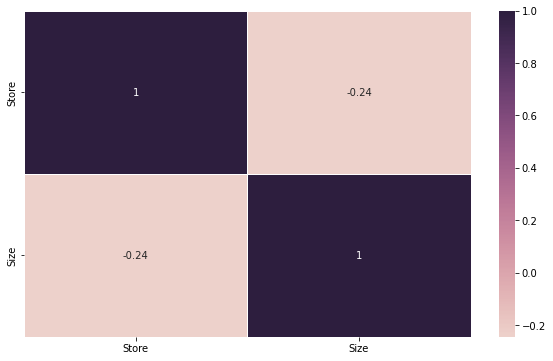

In [4]:
labels = [col.replace('_', ' ').title() for col in df.select_dtypes(include=['number', 'bool']).columns]

fig, ax = plt.subplots(figsize=(10, 6))
_ = sns.heatmap(
    df.corr(method='pearson'),
    annot=True,
    xticklabels=labels,
    yticklabels=labels,
    cmap=sns.cubehelix_palette(as_cmap=True), # 'coolwarm'
    linewidths=.5,
    ax=ax,
)

### Extra

For some business cases you should consider other factors based on historical data, events, user attributes, and business case specifics:

- Strength - a relationship is more likely to be causal if the correlation coefficient is large and statistically significant. This is directly related to the correlation table output data.

- Consistency - a relationship is more likely to be causal if it can be replicated. 

- Temporality - a relationship is more likely to be causal if the effect always occurs after the cause.

- Gradient - a relationship is more likely to be causal if greater exposure to the suspected cause leads to a greater effect. This is related to positive or negative correlation. As I stated above, negative correlation occurs when one variable decreases as the other one increases. 

- Experiment - a relationship is more likely to be causal if it can be verified experimentally. You can run hypothesis testing to prove it.

- Analogy - a relationship is more likely to be causal if there are proven relationships between similar causes and effects.